<a href="https://colab.research.google.com/github/pds1920/capstone-group-6/blob/master/TrainingWithResnet50andDiffSizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = "gdrive/My Drive/PDS/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michipds","key":"2924b7242071b81425b660f2b1a5bd87"}'}

In [0]:
# when you need extra ram
#a = []
#while(1):
#    a.append("1")

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c the-nature-conservancy-fisheries-monitoring 

100% 829M/832M [00:07<00:00, 158MB/s]
100% 832M/832M [00:07<00:00, 109MB/s]
  0% 0.00/3.74k [00:00<?, ?B/s]
100% 3.74k/3.74k [00:00<00:00, 11.5MB/s]
 97% 225M/231M [00:06<00:00, 36.8MB/s]
100% 231M/231M [00:06<00:00, 37.7MB/s]
 99% 1.06G/1.07G [00:13<00:00, 113MB/s] 
100% 1.07G/1.07G [00:14<00:00, 82.2MB/s]
  0% 0.00/35.8k [00:00<?, ?B/s]
100% 35.8k/35.8k [00:00<00:00, 35.8MB/s]


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import zipfile
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("train_dir")

In [0]:
import zipfile
with zipfile.ZipFile("test_stg1.zip", 'r') as zip_ref:
    zip_ref.extractall("test_dir")

In [9]:
#unzip test_stg2
!7z x test_stg2.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1152137421 bytes (1099 MiB)

Extracting archive: test_stg2.7z
--
Path = test_stg2.7z
Type = 7z
Physical Size = 1152137421
Headers Size = 82081
Method = LZMA:25
Solid = +
Blocks = 1

  0%      0% - test_stg2/image_00001.jpg                                  0% 38 - test_stg2/image_00039.jpg                                     0% 80 - test_stg2/image_00081.jpg                                     1% 125 - test_stg2/image_00126.jpg                                    

In [0]:
path_img = "train_dir/train"

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_img, train=".",
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size=224,
                                  bs=32,
                                  ).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics= accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 55.3MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


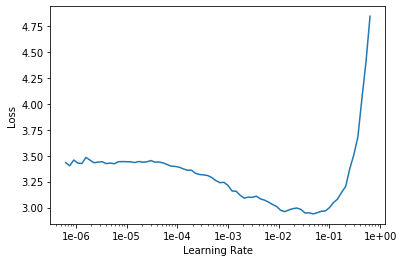

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=1.0e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.129610,1.176854,0.691391,02:30
1,1.377792,0.742296,0.778808,02:30
2,0.949728,0.504513,0.850331,02:29
3,0.720280,0.426887,0.874172,02:30
4,0.576361,0.399119,0.880795,02:28


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


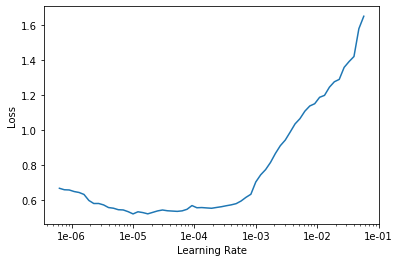

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.562828,0.434419,0.876821,02:35
1,0.584172,0.434472,0.878146,02:33
2,0.423665,0.390870,0.908609,02:30
3,0.275292,0.257366,0.935099,02:31
4,0.195615,0.235705,0.935099,02:30
5,0.136482,0.212092,0.950993,02:30


In [0]:
learn.save("stage-2")

In [0]:
#change size
data = ImageDataBunch.from_folder(path_img, train=".",
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size=(1280,720),
                                  bs=8,
                                  ).normalize(imagenet_stats)
learn.data = data

In [0]:
learn.freeze()
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


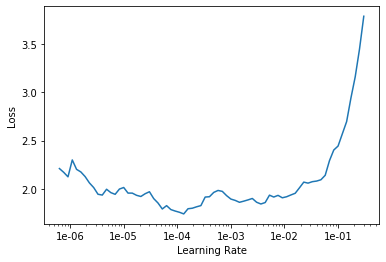

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-4)


epoch,train_loss,valid_loss,accuracy,time
0,1.552363,0.912406,0.700662,06:34
1,0.993575,0.605061,0.800000,06:26
2,1.036248,0.504061,0.846358,06:26
3,0.792687,0.469434,0.850331,06:26
4,0.844715,0.447508,0.851656,06:25


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


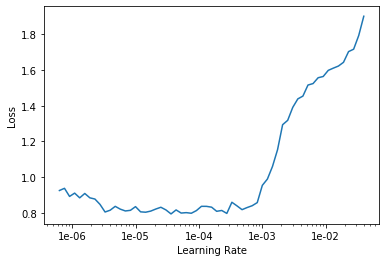

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.899140,0.427776,0.866225,06:50
1,0.782310,0.452253,0.849007,06:50
2,0.540565,0.390653,0.883444,06:47
3,0.350950,0.216315,0.923179,06:50
4,0.183445,0.168754,0.954967,06:47
5,0.151033,0.144633,0.960265,06:48


In [0]:
learn.save("stage-3-resnet50")

In [0]:
learn.export("resnet-resize")

submission

In [0]:
learn = load_learner("/content/resnet_resize")

In [0]:
learn.data.add_test(ImageList.from_folder("/content/test_dir/test_stg1"))


In [13]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)


In [0]:
names_stg1 = [x.name for x in learn.data.test_ds.items]
res_stg1 = pd.DataFrame(preds.numpy(), columns=learn.data.classes)
res_stg1.insert(0, 'image', names_stg1)


In [15]:
res_stg1.head()

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_01716.jpg,5.334161e-04,0.000006,1.841671e-04,0.000078,0.998928,1.658636e-04,0.000042,0.000063
1,img_07050.jpg,2.690714e-05,0.000720,3.731748e-05,0.999085,0.000046,5.009679e-06,0.000078,0.000001
2,img_06756.jpg,9.957852e-01,0.000071,1.548846e-05,0.000016,0.000955,1.844452e-03,0.000004,0.001309
3,img_02077.jpg,4.897487e-02,0.003865,7.729859e-02,0.404985,0.001508,4.161971e-01,0.012543,0.034628
4,img_06914.jpg,8.604888e-07,0.000025,2.535047e-07,0.000002,0.999965,1.416567e-07,0.000005,0.000001


In [16]:
learn.data.add_test(ImageList.from_folder("/content/test_stg2"))
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
names_stg2 = ['test_stg2/'+x.name for x in learn.data.test_ds.items]
res_stg2 = pd.DataFrame(preds.numpy(), columns=learn.data.classes)
res_stg2.insert(0, 'image', names_stg2)


In [0]:
pd.concat([res_stg1, res_stg2]).to_csv('submissionresnet50resize.csv', index=False)


kaggle submission: 

Private Score: 2.38802

Public Score: 1.05156